In [2]:
!pip install folium



   -------------------- ------------------- 1/2 [folium]
   ---------------------------------------- 2/2 [folium]



In [4]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
metro_data = pd.read_csv(r"C:\Users\hawka\data science project\Delhi-Metro-Network.csv")

print(metro_data.head())

   Station ID         Station Name  Distance from Start (km)          Line  \
0           1             Jhil Mil                      10.3      Red line   
1           2  Welcome [Conn: Red]                      46.8     Pink line   
2           3          DLF Phase 3                      10.0   Rapid Metro   
3           4           Okhla NSIC                      23.8  Magenta line   
4           5           Dwarka Mor                      10.2     Blue line   

  Opening Date Station Layout   Latitude  Longitude  
0   2008-04-06       Elevated  28.675790  77.312390  
1   2018-10-31       Elevated  28.671800  77.277560  
2   2013-11-14       Elevated  28.493600  77.093500  
3   2017-12-25       Elevated  28.554483  77.264849  
4   2005-12-30       Elevated  28.619320  77.033260  


In [5]:
missing_values = metro_data.isnull().sum()
data_types = metro_data.dtypes
missing_values


Station ID                  0
Station Name                0
Distance from Start (km)    0
Line                        0
Opening Date                0
Station Layout              0
Latitude                    0
Longitude                   0
dtype: int64

In [6]:
data_types

Station ID                    int64
Station Name                 object
Distance from Start (km)    float64
Line                         object
Opening Date                 object
Station Layout               object
Latitude                    float64
Longitude                   float64
dtype: object

In [7]:
metro_data['Opening Date'] = pd.to_datetime(metro_data['Opening Date'])

In [8]:
line_colors = {'Red line': 'red','Blue line': "blue","Yellow line":'beige','Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkred',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'black',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'lightblue',
    'Gray line': 'lightgray'}

delhi_map_with_line_tooltip = folium.Map(location=[28.7041,77.1025],zoom_start = 11)
for i,row in metro_data.iterrows():
    line = row['Line']
    color = line_colors.get(line,"black")
    folium.Marker(location=[row['Latitude'],row['Longitude']],popup = f"{row['Station Name']}",tooltip  = f"{row['Station Name']},{line}",icon = folium.Icon(color=color)
                 ).add_to(delhi_map_with_line_tooltip)
    
delhi_map_with_line_tooltip


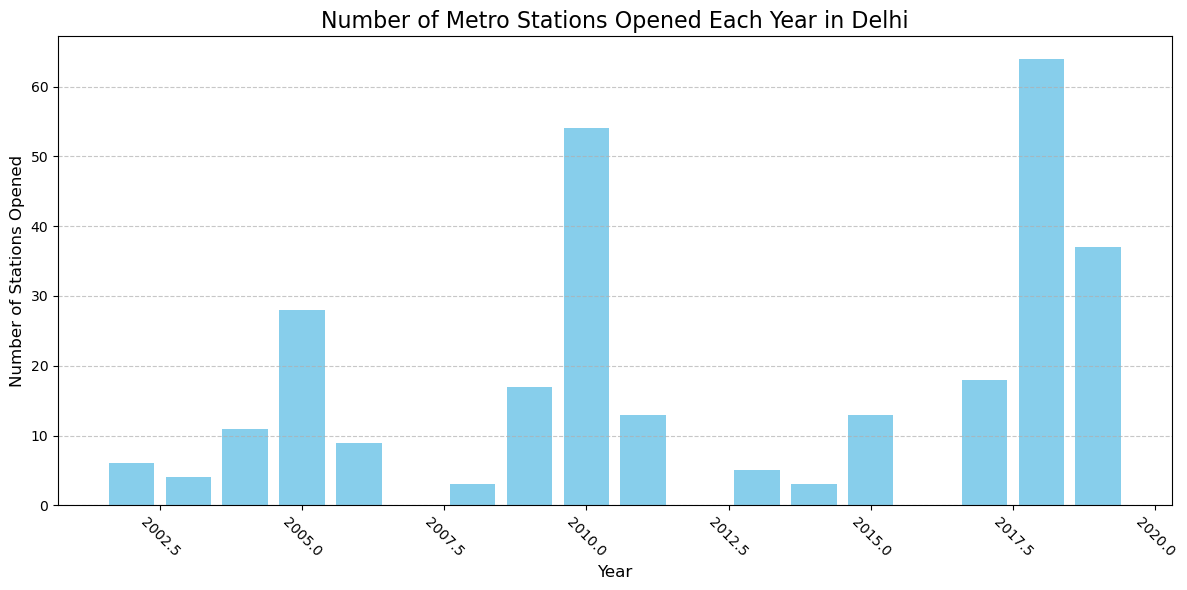

In [9]:
metro_data['Opening Year'] = metro_data['Opening Date'].dt.year
stations_per_year = metro_data['Opening Year'].value_counts().sort_index()
stations_per_year_df = stations_per_year.reset_index()
stations_per_year_df.columns = ['Year', 'Number of Stations']

plt.figure(figsize=(12,6))
plt.bar(stations_per_year_df['Year'], stations_per_year_df['Number of Stations'], color='skyblue')
plt.title("Number of Metro Stations Opened Each Year in Delhi", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Stations Opened", fontsize=12)
plt.xticks(rotation=-45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [10]:
stations_per_line = metro_data['Line'].value_counts()
total_distance_per_line =metro_data.groupby('Line')['Distance from Start (km)'].max()
avg_distance_per_line = total_distance_per_line/(stations_per_line - 1)
line_analysis =pd.DataFrame({
    "Line": stations_per_line.index,
    'Number of stations':stations_per_line.values,
    'Average Distance Between Stations(km)':avg_distance_per_line
})
line_analysis = line_analysis.sort_values(by = 'Number of stations',ascending= False)
line_analysis.reset_index(drop=True,inplace = True )
print(line_analysis)




                 Line  Number of stations  \
0           Blue line                  49   
1           Pink line                  38   
2         Yellow line                  37   
3         Voilet line                  34   
4            Red line                  29   
5        Magenta line                  25   
6           Aqua line                  21   
7          Green line                  21   
8         Rapid Metro                  11   
9    Blue line branch                   8   
10        Orange line                   6   
11          Gray line                   3   
12  Green line branch                   3   

    Average Distance Between Stations(km)  
0                                1.355000  
1                                1.097917  
2                                1.157143  
3                                1.950000  
4                                1.240000  
5                                1.050000  
6                                1.379167  
7                

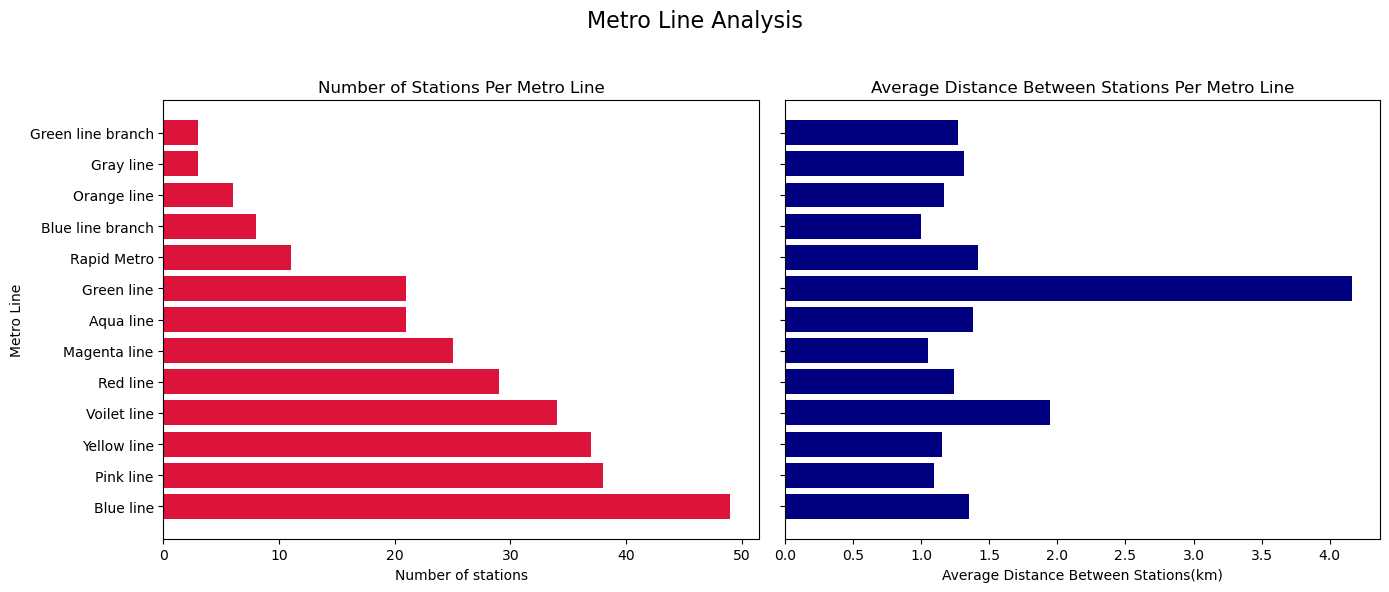

In [13]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
fig.suptitle('Metro Line Analysis', fontsize=16)

# Plot 1: Number of Stations
axes[0].barh(line_analysis['Line'], line_analysis['Number of stations'], color='crimson')
axes[0].set_xlabel('Number of stations')
axes[0].set_ylabel('Metro Line')
axes[0].set_title('Number of Stations Per Metro Line')

# Plot 2: Average Distance Between Stations
axes[1].barh(line_analysis['Line'], line_analysis['Average Distance Between Stations(km)'], color='navy')
axes[1].set_xlabel('Average Distance Between Stations(km)')
axes[1].set_title('Average Distance Between Stations Per Metro Line')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


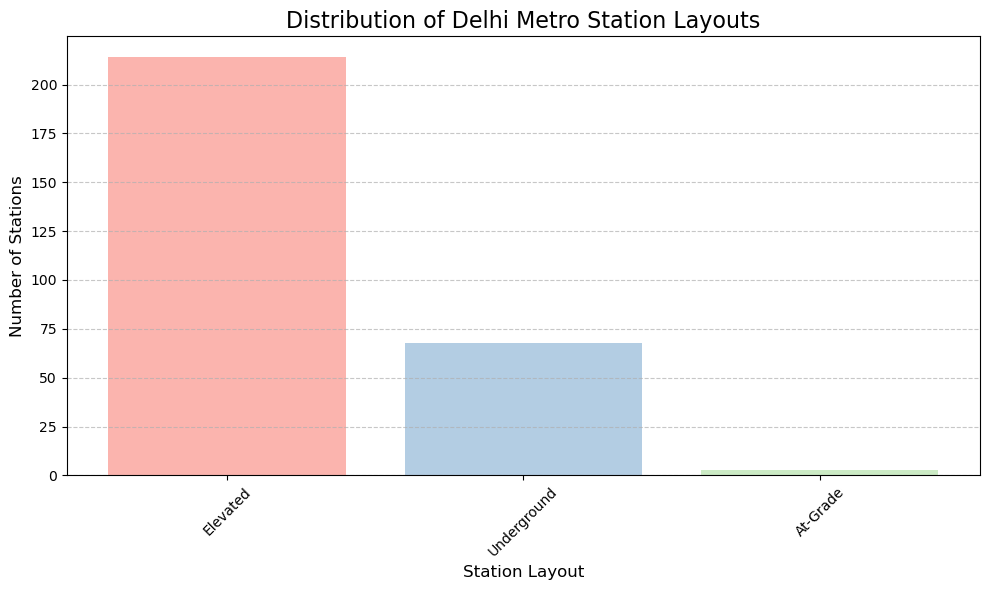

In [14]:
layout_counts = metro_data['Station Layout'].value_counts()

plt.figure(figsize=(10,6))
colors = plt.cm.Pastel1(range(len(layout_counts)))
plt.bar(layout_counts.index, layout_counts.values, color=colors)
plt.title('Distribution of Delhi Metro Station Layouts', fontsize=16)
plt.xlabel('Station Layout', fontsize=12)
plt.ylabel('Number of Stations', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()